In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(filepath_or_buffer=r'./Mall_Customers.csv')
dataset.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


## Taking now Annual Income (k) &	Spending Score (1-100) only

In [3]:
X = dataset.iloc[:, [3,4]].values

## Using the elbow method to find the optimal number of clusters

In [4]:
from sklearn.cluster import KMeans

In [5]:
wcss=[]

In [6]:
for no_clusters in range (1, 10):
    kmeans = KMeans(n_clusters=no_clusters, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

### ploting elbow methode results

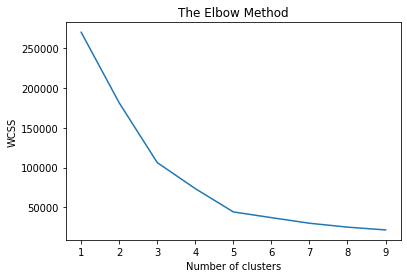

In [7]:
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### As no clusters 5 is the optimal
## Fitting K-Means to the dataset

In [8]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X)
y_predict = kmeans.predict(X)

## Visualising the clusters

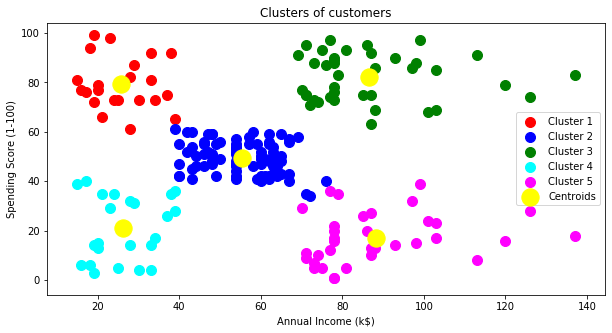

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_predict == 3, 0], X[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_predict == 4, 0], X[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()